# Exploratory data analysis on fitbit activity data

In [1]:
import pandas as pd;
import matplotlib.pyplot as plt;
%matplotlib inline


In [2]:
data = pd.read_csv('../data/fitbit_export_activity_jan_mar.csv');

In this notebook, we'll analyse data from a so called <activity tracker>. The data concerns one particular person and covers the period of 3 months. Let's see if we can show any interesting trends and dependencies in there.

In [3]:
data.head(15)

,Date,CalBurned,Steps,Distance,Floors,MinNoActivity,MinLowActivity,MinMidActivity,MinHighActivity,Cal
0,01-01-2016,1491,0,0,0,1440,0,0,0,0
1,02-01-2016,1491,0,0,0,1440,0,0,0,0
2,03-01-2016,1491,0,0,0,1440,0,0,0,0
3,04-01-2016,1491,0,0,0,1440,0,0,0,0
4,05-01-2016,1491,0,0,0,1440,0,0,0,0
5,06-01-2016,1491,0,0,0,1440,0,0,0,0
6,07-01-2016,1491,0,0,0,1440,0,0,0,0
7,08-01-2016,1491,0,0,0,1440,0,0,0,0
8,09-01-2016,1491,0,0,0,1440,0,0,0,0
9,10-01-2016,1993,11290,"7,64",0,1180,115,10,51,660


In [4]:
data.describe()

,CalBurned,Steps,Floors,MinNoActivity,MinLowActivity,MinMidActivity,MinHighActivity,Cal
count,91.000000,91.000000,91,91.000000,91.000000,91.000000,91.000000,91.000000
mean,2254.505495,10170.549451,0,809.791209,206.912088,18.351648,36.582418,998.571429
std,470.214097,6838.523493,0,342.394948,113.502486,17.776622,35.737956,606.287540
min,1463.000000,0.000000,0,295.000000,0.000000,0.000000,0.000000,0.000000
25%,2096.500000,7236.500000,0,566.000000,184.500000,6.000000,16.000000,783.500000
50%,2298.000000,10270.000000,0,691.000000,237.000000,14.000000,28.000000,1060.000000
75%,2498.500000,13682.000000,0,1001.000000,274.000000,25.000000,49.500000,1319.500000
max,3438.000000,31093.000000,0,1440.000000,420.000000,75.000000,203.000000,2459.000000


# Cleaning of the data
The data contains several records where absolutely no activity was tracked. Most certainly the person was not using their device on that day. These records contain no useful information at all, we'll discard them.

In [5]:
data.head(5)

,Date,CalBurned,Steps,Distance,Floors,MinNoActivity,MinLowActivity,MinMidActivity,MinHighActivity,Cal
0,01-01-2016,1491,0,0,0,1440,0,0,0,0
1,02-01-2016,1491,0,0,0,1440,0,0,0,0
2,03-01-2016,1491,0,0,0,1440,0,0,0,0
3,04-01-2016,1491,0,0,0,1440,0,0,0,0
4,05-01-2016,1491,0,0,0,1440,0,0,0,0


In [6]:
data = data[data['MinNoActivity']!= 1440] # drop the days where no activity was tracked at all


One day consists of 24 * 60 = 11440 minutes. We can see however that the minutues within one day in our data do not add up to this value. To better account for fact, we introduce a new column, for 'MinUnknown' containing the missing minutes.

In [7]:
minUnknown = 1440 - data.loc[:,('MinNoActivity','MinLowActivity', 'MinMidActivity', 'MinHighActivity')].sum(axis = 1) # sum across columns


In [8]:
data['MinUnknown'] = minUnknown


In [9]:
data.head()

,Date,CalBurned,Steps,Distance,Floors,MinNoActivity,MinLowActivity,MinMidActivity,MinHighActivity,Cal,MinUnknown
9,10-01-2016,1993,11290,"7,64",0,1180,115,10,51,660,84
10,11-01-2016,2460,11419,"7,78",0,649,284,16,32,1232,459
11,12-01-2016,2823,17148,"11,63",0,547,355,17,65,1716,456
12,13-01-2016,2352,10652,"7,24",0,734,207,20,48,1069,431
13,14-01-2016,2264,10276,"7,03",0,1206,187,8,39,959,0


# Visualizing the data
Let's see some graphical representations of the data. When we plot the more (mid/high) active minutes, we see an interesting pattern.

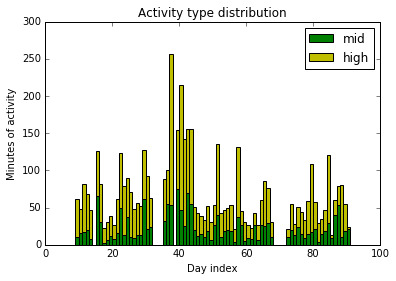

In [10]:
# fig, ax = plt.subplots()
width = 1
#p1 = plt.bar(data.index.values, data['MinLowActivity'], width, color='g')
#p2 = plt.bar(data.index.values, data['MinMidActivity'], width, color='y', bottom=data['MinLowActivity'])
#p3 = plt.bar(data.index.values, data['MinHighActivity'], width, color='r', bottom=data['MinLowActivity']+data['MinMidActivity'])

p1 = plt.bar(data.index.values, data['MinMidActivity'], width, color='g')
p2 = plt.bar(data.index.values, data['MinHighActivity'], width, color='y', bottom=data['MinMidActivity'])

plt.title('Activity type distribution')
plt.xlabel('Day index')

plt.ylabel('Minutes of activity')
plt.legend(['mid', 'high'],loc='upper right')
plt.show()


Note the periodic raise in mid/high activity on the weekends. The vacation is also clearly visibile on this chart: around day at index 40 we see an unusually high activity for almost a week.

Let's investigate how active this person is on average.

In [11]:
print( "Average activity per day in hours None=", round(data['MinNoActivity'].mean()/60,1), "Low=",round(data['MinLowActivity'].mean()/60,1), "Mid=",round(data['MinMidActivity'].mean()/60,1), "High=",round(data['MinHighActivity'].mean()/60,1))

Average activity per day in hours None= 11.4 Low= 4.1 Mid= 0.4 High= 0.7


In [12]:
data['Steps'].mean()

12177.894736842105

In conclusion, the person does not spend much time in an active way an a working day. However, he/she is more active on weekends, and on average reaches the doctors recomendation of 10 thousand steps per day.

# Adding new features
Since we have already seen that the activity clearly depends on the day of the week, we'll add this feature.

In [13]:
#This is how to convert the date to day of week
import datetime

data['WeekDay'] = data['Date'].apply(lambda x: datetime.datetime.strptime(x, '%d-%m-%Y').strftime('%a'))

In [14]:
data.head(3)

,Date,CalBurned,Steps,Distance,Floors,MinNoActivity,MinLowActivity,MinMidActivity,MinHighActivity,Cal,MinUnknown,WeekDay
9,10-01-2016,1993,11290,"7,64",0,1180,115,10,51,660,84,Sun
10,11-01-2016,2460,11419,"7,78",0,649,284,16,32,1232,459,Mon
11,12-01-2016,2823,17148,"11,63",0,547,355,17,65,1716,456,Tue


# Analysing data per week day
Let's check the averages per day of the week.

In [15]:
data.groupby('WeekDay').mean()

,CalBurned,Steps,Floors,MinNoActivity,MinLowActivity,MinMidActivity,MinHighActivity,Cal,MinUnknown
WeekDay,,,,,,,,,
Fri,2363.800000,11237.700000,0,714.000000,242.900000,18.500000,40.500000,1135.500000,424.100000
Mon,2317.500000,10469.333333,0,650.000000,242.083333,19.250000,31.416667,1083.666667,497.250000
Sat,2602.800000,15609.600000,0,607.600000,275.900000,40.200000,54.800000,1460.500000,461.500000
Sun,2439.750000,13833.166667,0,705.666667,223.750000,25.666667,64.250000,1251.166667,420.666667
Thu,2415.500000,11779.500000,0,736.100000,265.000000,17.200000,36.400000,1192.000000,385.300000
Tue,2321.166667,10622.666667,0,722.250000,237.666667,15.750000,35.833333,1080.250000,428.500000
Wed,2419.900000,12015.000000,0,657.900000,254.900000,18.300000,43.400000,1200.900000,465.500000


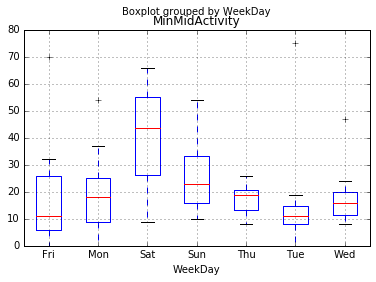

In [16]:
data.boxplot(by='WeekDay',column='MinMidActivity')

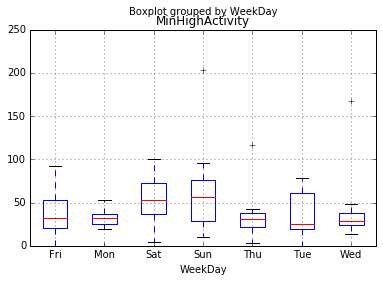

In [17]:
data.boxplot(by='WeekDay', column='MinHighActivity')

Let's see the correlation between the columns. Looks like "CalBurned" is calculated based on number of steps!

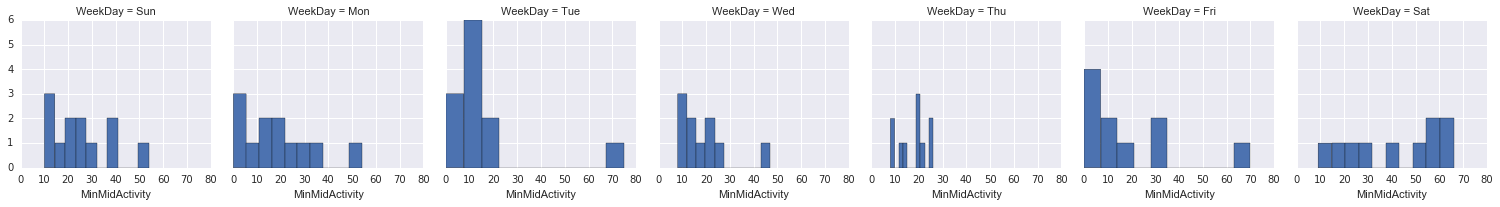

In [19]:
import seaborn as sns
g = sns.FacetGrid(col="WeekDay", data=data)
g.map(plt.hist, "MinMidActivity")

In [ ]:
data.corr()